In [1]:
import pandas as pd

In [2]:
import numpy as pd

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(tokens)

In [5]:
df=pd.read_csv("train.csv")

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2142 non-null   int64 
 1   description_x  2142 non-null   object
 2   description_y  2142 non-null   object
 3   ticker_x       2142 non-null   object
 4   ticker_y       2142 non-null   object
 5   same_security  2142 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 85.9+ KB


In [8]:
df.shape

(2142, 6)

In [9]:
df.head

<bound method NDFrame.head of       Unnamed: 0                                      description_x  \
0              0                     first trust dow jones internet   
1              1                schwab intl large company index etf   
2              2                       vanguard small cap index adm   
3              3  duke energy corp new com new isin #us4 sedol #...   
4              4                                   visa inc class a   
...          ...                                                ...   
2137        2137                            delta air lines inc com   
2138        2138                           cognizant tech solutns a   
2139        2139  pimco investment grade corporate bond fund - c...   
2140        2140                                 eli lilly & co com   
2141        2141                                dfa comm strategy i   

                                          description_y ticker_x ticker_y  \
0                           first trust 

In [10]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0                                      description_x  \
0              0                     first trust dow jones internet   
1              1                schwab intl large company index etf   
2              2                       vanguard small cap index adm   
3              3  duke energy corp new com new isin #us4 sedol #...   
4              4                                   visa inc class a   
...          ...                                                ...   
2137        2137                            delta air lines inc com   
2138        2138                           cognizant tech solutns a   
2139        2139  pimco investment grade corporate bond fund - c...   
2140        2140                                 eli lilly & co com   
2141        2141                                dfa comm strategy i   

                                          description_y ticker_x ticker_y  \
0                           first trust 

In [11]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                      description_x  \
0              0                     first trust dow jones internet   
1              1                schwab intl large company index etf   
2              2                       vanguard small cap index adm   
3              3  duke energy corp new com new isin #us4 sedol #...   
4              4                                   visa inc class a   
...          ...                                                ...   
2137        2137                            delta air lines inc com   
2138        2138                           cognizant tech solutns a   
2139        2139  pimco investment grade corporate bond fund - c...   
2140        2140                                 eli lilly & co com   
2141        2141                                dfa comm strategy i   

                                          description_y ticker_x ticker_y  \
0                           first tr

In [12]:
df.columns

Index(['Unnamed: 0', 'description_x', 'description_y', 'ticker_x', 'ticker_y',
       'same_security'],
      dtype='object')

In [13]:
df.keys

<bound method NDFrame.keys of       Unnamed: 0                                      description_x  \
0              0                     first trust dow jones internet   
1              1                schwab intl large company index etf   
2              2                       vanguard small cap index adm   
3              3  duke energy corp new com new isin #us4 sedol #...   
4              4                                   visa inc class a   
...          ...                                                ...   
2137        2137                            delta air lines inc com   
2138        2138                           cognizant tech solutns a   
2139        2139  pimco investment grade corporate bond fund - c...   
2140        2140                                 eli lilly & co com   
2141        2141                                dfa comm strategy i   

                                          description_y ticker_x ticker_y  \
0                           first trust 

In [14]:
df.dtypes

Unnamed: 0        int64
description_x    object
description_y    object
ticker_x         object
ticker_y         object
same_security      bool
dtype: object

In [15]:
df.iloc[0]

Unnamed: 0                                    0
description_x    first trust dow jones internet
description_y       first trust dj internet idx
ticker_x                                    FDN
ticker_y                                    FDN
same_security                              True
Name: 0, dtype: object

In [16]:
df.iloc[1]

Unnamed: 0                                                       1
description_x                  schwab intl large company index etf
description_y    schwab strategic tr fundamental intl large co ...
ticker_x                                                      FNDF
ticker_y                                                      FNDF
same_security                                                 True
Name: 1, dtype: object

In [17]:
df.iloc[3]

Unnamed: 0                                                       3
description_x    duke energy corp new com new isin #us4 sedol #...
description_y    duke energy corp new com new isin #us26441c204...
ticker_x                                                       DUK
ticker_y                                                       DUK
same_security                                                 True
Name: 3, dtype: object

In [18]:
df.isnull().sum()

Unnamed: 0       0
description_x    0
description_y    0
ticker_x         0
ticker_y         0
same_security    0
dtype: int64

In [19]:
df.drop_duplicates()

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True
...,...,...,...,...,...,...
2137,2137,delta air lines inc com,delta air lines inc dela new,DAL,DAL,True
2138,2138,cognizant tech solutns a,cognizant tech solutions corp,CTSH,CTSH,True
2139,2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,PBDAX,FCONX,False
2140,2140,eli lilly & co com,lilly eli &co com npv,LLY,LLY,True


In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt

(array([518., 346., 247., 225., 203., 152., 138., 122., 103.,  88.]),
 array([  0.,  84., 168., 252., 336., 420., 504., 588., 672., 756., 840.]),
 <BarContainer object of 10 artists>)

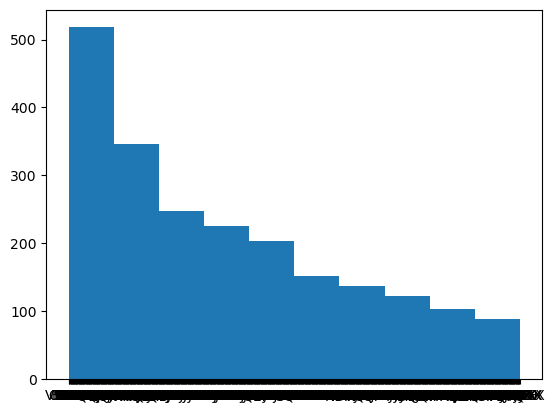

In [22]:
plt.hist(df["ticker_x"])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
df["description_x"]=le.fit_transform(df["description_x"])
df["description_y"]=le.fit_transform(df["description_y"])
df["ticker_x"]=le.fit_transform(df["ticker_x"])
df["ticker_y"]=le.fit_transform(df["ticker_y"])

In [26]:
df

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,461,478,233,262,True
1,1,998,1013,250,281,True
2,2,1421,1430,775,783,False
3,3,366,388,184,205,True
4,4,1508,1501,700,706,True
...,...,...,...,...,...,...
2137,2137,308,325,152,170,True
2138,2138,278,288,141,159,True
2139,2139,896,445,495,256,False
2140,2140,378,724,383,417,True


{'whiskers': [<matplotlib.lines.Line2D at 0x1225275d810>,
 'caps': [<matplotlib.lines.Line2D at 0x1225275da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1225275d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1225275dd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1225275de50>],
 'means': []}

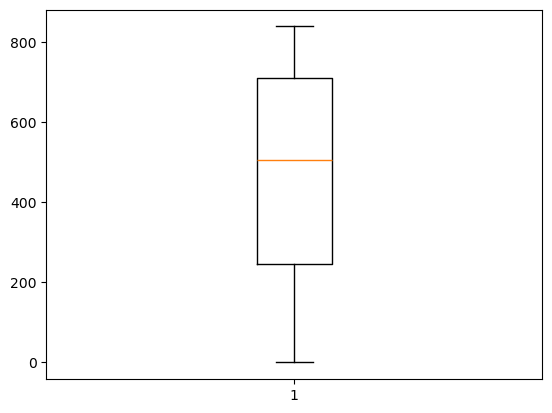

In [27]:
plt.boxplot(df["ticker_x"])

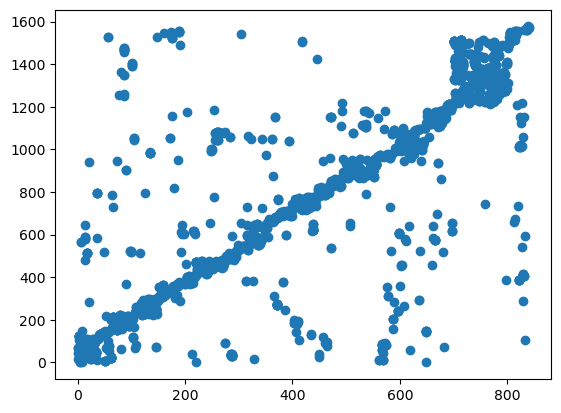

In [28]:
plt.scatter(df["ticker_x"],df["description_x"])

In [29]:
pip install nltk

In [30]:
# Imports
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    filtered_tokens = [
        word for word in tokens if word.isalpha() and word not in stop_words
    ]
    return filtered_tokens

# Example usage
example_text = "This is a sample sentence, showing off the stop words filtration."
processed = preprocess_text(example_text)
print(processed)

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


[nltk_data] Downloading package punkt to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import nltk
nltk.download('punkt_tab')  # This will probably fail because it’s not a standard package


[nltk_data] Downloading package punkt_tab to C:\Users\SYSTEM
[nltk_data]     53\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def preprocess_text(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return filtered_tokens

example_text = "This is a sample sentence, showing off the stop words filtration."
processed = preprocess_text(example_text)
print(processed)


['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample text data
texts = [
    "I love machine learning",
    "Machine learning is amazing",
    "I enjoy sports and outdoor activities",
]

# Step 1: Convert texts to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Step 2: Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print("Cosine Similarity Matrix (TF-IDF):")
print(cosine_sim_matrix)


Cosine Similarity Matrix (TF-IDF):
[[1.         0.44333251 0.        ]
 [0.44333251 1.         0.        ]
 [0.         0.         1.        ]]


In [34]:
pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install gensim

  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Users\SYSTEM 53\anaconda3\python.exe C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f8afa0c63e9666be59\vendored-meson\meson\meson.py setup C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f8afa0c63e9666be59 C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f8afa0c63e9666be59\.mesonpy-q44sdvq8 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f8afa0c63e9666be59\.mesonpy-q44sdvq8\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f8afa0c63e9666be59
  Build dir: C:\Users\SYSTEM 53\AppData\Local\Temp\pip-install-bakbaefa\numpy_a00421ece29248f

In [36]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# from gensim.models import KeyedVectors  # Uncomment if you have gensim and real embeddings

class MockModel:
    def __init__(self):
        self.vocab = {'machine', 'learning', 'love', 'amazing', 'enjoy', 'sports', 'outdoor', 'activities', 'is', 'and', 'i'}

    def __contains__(self, word):
        return word in self.vocab

    def get_vector(self, word):
        # Use a deterministic random seed per word to generate reproducible vectors
        np.random.seed(hash(word) % 123456)
        return np.random.rand(300)

model = MockModel()

texts = [
    "I love machine learning",
    "Machine learning is amazing",
    "I enjoy sports and outdoor activities",
]

def text_to_avg_vector(text, model):
    words = text.lower().split()
    vectors = [model.get_vector(w) for w in words if w in model]
    if not vectors:
        return np.zeros(300)
    return np.mean(vectors, axis=0)

# Create vector representations of each text
vectors = np.vstack([text_to_avg_vector(text, model) for text in texts])

# Compute cosine similarity matrix between text vectors
cosine_sim_matrix = cosine_similarity(vectors)

print("Cosine Similarity Matrix (Word Embeddings):")
print(cosine_sim_matrix)


Cosine Similarity Matrix (Word Embeddings):
[[1.         0.9640445  0.94585971]
 [0.9640445  1.         0.93249464]
 [0.94585971 0.93249464 1.        ]]


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = [
    "I love machine learning",
    "Machine learning is amazing",
    "I enjoy sports and outdoor activities",
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print("Cosine Similarity Matrix (TF-IDF):")
print(cosine_sim_matrix)


Cosine Similarity Matrix (TF-IDF):
[[1.         0.44333251 0.        ]
 [0.44333251 1.         0.        ]
 [0.         0.         1.        ]]


In [38]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


Similarity Percentage Matrix:
[[100.    96.4   94.59]
 [ 96.4  100.    93.25]
 [ 94.59  93.25 100.  ]]


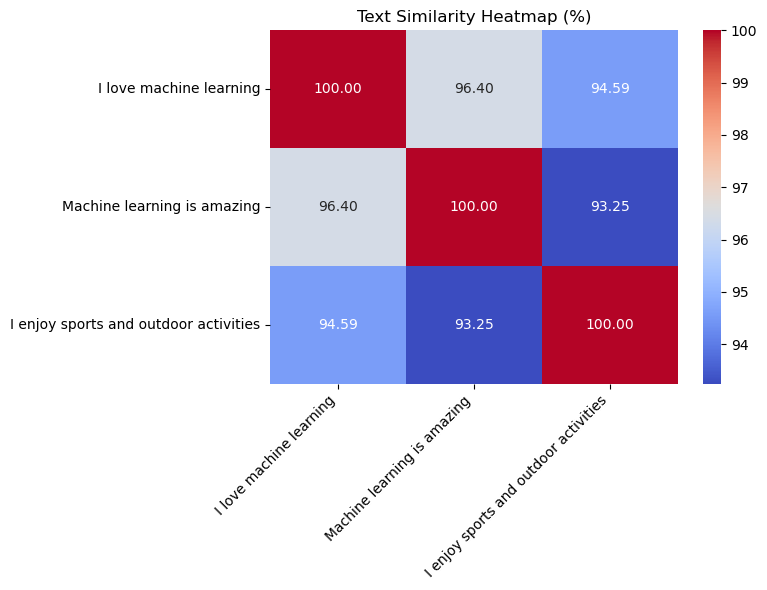

In [39]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

class MockModel:
    def __init__(self):
        self.vocab = {'machine', 'learning', 'love', 'amazing', 'enjoy', 'sports', 'outdoor', 'activities', 'is', 'and', 'i'}

    def __contains__(self, word):
        return word in self.vocab

    def get_vector(self, word):
        np.random.seed(hash(word) % 123456)
        return np.random.rand(300)

model = MockModel()

texts = [
    "I love machine learning",
    "Machine learning is amazing",
    "I enjoy sports and outdoor activities",
]

def text_to_avg_vector(text, model):
    words = text.lower().split()
    vectors = [model.get_vector(w) for w in words if w in model]
    if not vectors:
        return np.zeros(300)
    return np.mean(vectors, axis=0)

# Create vector representations of texts
vectors = np.vstack([text_to_avg_vector(text, model) for text in texts])

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(vectors)

# Convert similarity to percentage (0% to 100%)
similarity_percentage = cosine_sim_matrix * 100

print("Similarity Percentage Matrix:")
print(np.round(similarity_percentage, 2))  # Rounded for readability

# Plot heatmap if multiple texts
if len(texts) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_percentage, annot=True, cmap="coolwarm", xticklabels=texts, yticklabels=texts, fmt=".2f")
    plt.title("Text Similarity Heatmap (%)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()